In [20]:

%load_ext autoreload

%autoreload 2

from RNN2DFA.LSTM import LSTMNetwork
# from GRU import GRUNetwork
from RNN2DFA.RNNClassifier import RNNClassifier
from RNN2DFA.Training_Functions import mixed_curriculum_train,make_train_set_for_target
from Tomita_Grammars import tomita_1, tomita_2, tomita_3, tomita_4, tomita_5, tomita_6, tomita_7, tomita_8, tomita_9, tomita_10
from lstar_extraction.Training_Functions import make_test_set
from RNNexplainer import Explainer







The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
# make training set
target = tomita_10
alphabet = "ab"

# alphabet = "abcd"
train_set = make_train_set_for_target(target,alphabet)

# define rnn
rnn = RNNClassifier(alphabet,num_layers=1,hidden_dim=10,RNNClass = LSTMNetwork)


print(train_set)


aababb': False, 'abaaaabbaaa': False, 'ababaaaaaab': False, 'abababbbaab': False, 'ababaabbbba': False, 'abbbaababba': False, 'babaabbabab': False, 'babbbabbaab': False, 'babbbbbaaab': False, 'abbbaabaaab': False, 'ababaabaaab': False, 'bbbaaaabbba': False, 'bbaaaaaaaab': False, 'aaababbbaba': False, 'aaabababbbb': False, 'abaabbbaaaa': False, 'abaababbaab': False, 'abbaabbaaaa': False, 'aaabaaabaaa': False, 'babaaababab': False, 'bbbbabaabba': False, 'aabaaaaaabb': False, 'bbbbabaabbb': False, 'bbbbaabbaaa': False, 'baabbbabaab': False, 'babaaaaabbb': False, 'bbabaabaabb': False, 'abaaaaaabba': False, 'aaabbabbabb': False, 'aaaababaaaa': False, 'abbbaabbaab': False, 'bababaaabab': False, 'aaaaabbbbaa': False, 'abaabaabbbb': False, 'babbbaabbab': False, 'bbbbababbaa': False, 'baabbbabbaa': False, 'aaaabababba': False, 'baabbabbbaa': False, 'ababaababba': False, 'abaababbbbb': False, 'abbbbbbabaa': False, 'babbbbbbaab': False, 'bbabbabaaaa': False, 'bbbbbbbbaaa': False, 'baabbabbaab': F

current average loss is:  0.0029224107382245946


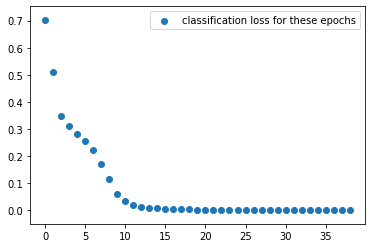

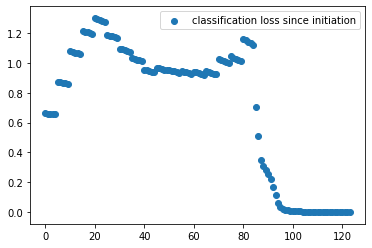

classification loss on last batch was: 0.0004973598557940293


In [22]:
# train the model
mixed_curriculum_train(rnn,train_set,stop_threshold = 0.0005)
rnn.renew()  


In [23]:
"""  
from lstar implementation
"""

if(False):

    # starting examples
    # all_words = sorted(list(train_set.keys()),key=lambda x:len(x))
    # pos = next((w for w in all_words if rnn.classify_word(w)==True),None)
    # neg = next((w for w in all_words if rnn.classify_word(w)==False),None)
    # starting_examples = [w for w in [pos,neg] if not None == w]



    # extract DFA from RNN
    from RNN2DFA.Extraction import extract


    dfa_from_rnn = extract(rnn,time_limit = 50,initial_split_depth = 10,starting_examples=None)


    # some statistics
    from math import pow
    def percent(num,digits=2):
        tens = pow(10,digits)
        return str(int(100*num*tens)/tens)+"%"

    dfa_from_rnn.draw_nicely(maximum=30) #max size willing to draw

    test_set = train_set 
    print("testing on train set, i.e. test set is train set")
    # we're printing stats on the train set for now, but you can define other test sets by using
    # make_train_set_for_target again

    n = len(test_set)
    print("test set size:", n)
    pos = len([w for w in test_set if target(w)])
    print("of which positive:",pos,"("+percent(pos/n)+")")
    rnn_target = len([w for w in test_set if rnn.classify_word(w)==target(w)])
    print("rnn score against target on test set:",rnn_target,"("+percent(rnn_target/n)+")")
    dfa_rnn = len([w for w in test_set if rnn.classify_word(w)==dfa_from_rnn.classify_word(w)])
    print("extracted dfa score against rnn on test set:",dfa_rnn,"("+percent(dfa_rnn/n)+")")
    dfa_target = len([w for w in test_set if dfa_from_rnn.classify_word(w)==target(w)])
    print("extracted dfa score against target on rnn's test set:",dfa_target,"("+percent(dfa_target/n)+")")

else:
    """  
    Igor's code:
    The model itself is implemented as a DFA. 
    """


    dfa_from_rnn=rnn 

In [27]:
from PACTeacher.pac_teacher import PACTeacher as Teacher 
test_set=make_test_set(alphabet)

from RNNexplainer import Traces
traces=Traces(rnn, alphabet)
traces.label_from_network(test_set)
traces.write_in_file()


explainer=Explainer(alphabet=[character for character in alphabet])
teacher = Teacher(dfa_from_rnn,epsilon=.001, delta=.001, max_trace_length=20)
teacher.teach(explainer,traces)

print("final ltl: ", explainer.ltl)


made test set of size: 165
start formula depth: 1
learned LTL formula: (~ a)
7601
new counterexample: a




start formula depth: 2
learned LTL formula: (~ (X a))
8295
final ltl:  (~ (X a))
